In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [0]:
############################### IMPORTING LIBRARIES ############################

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly_express
import plotly_express as px

# Any results you write to the current directory are saved as output.

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

import io
from datetime import datetime
import time

In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score , roc_auc_score , f1_score, precision_score , average_precision_score , recall_score

In [0]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier , OneVsOneClassifier 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict , LeaveOneOut , ShuffleSplit,RandomizedSearchCV

In [0]:
## ONE VS REST CLASSIFIER 
# Binary Classification Problem 1: red vs [blue, green]
# Binary Classification Problem 2: blue vs [red, green]
# Binary Classification Problem 3: green vs [red, blue]

## ONE VS ONE CLASSIFIER 
# Binary Classification Problem 1: red vs. blue
# Binary Classification Problem 2: red vs. green
# Binary Classification Problem 3: red vs. yellow
# Binary Classification Problem 4: blue vs. green
# Binary Classification Problem 5: blue vs. yellow
# Binary Classification Problem 6: green vs. yellow

In [0]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

In [0]:
import os
os.chdir('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureEngineering/')

In [0]:
!ls

In [0]:
## copying the files to feature selection folder
!cp data.csv  '/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/'
!cp data_joined.csv  '/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/'

In [0]:
os.chdir('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/')

In [0]:
!ls

In [0]:
data = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/data.csv")
data_joined = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/data_joined.csv")
best_columns = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/best_columns.csv")
sample_submission = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/sample_submission.csv")
data_tst_ids = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/data_tst_ids.csv")
finalDf_pca = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/finalDf_pca.csv")

In [0]:
col_int = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

In [0]:
##########################################  SPLITTING THE DATA INTO TRAINING AND TESTING ###############################################

data_train = data[~data.greatstone_rating.isnull()]
data_tst = data[data.greatstone_rating.isnull()]

In [0]:

###################################* ******* NEURAL NETWORK - CROSS VALIDATION K FOLD  *********** #####################################################

In [0]:
#y_train_0 = tf.keras.utils.to_categorical(y_train_0, num_classes=6)
#y_valid_0 = tf.keras.utils.to_categorical(y_valid_0, num_classes=6)
#y_train_0

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
#y_train_0 = ohe.fit_transform(y_train_0).toarray()
#y_valid_0 = ohe.fit_transform(y_valid_0).toarray()
#y_train_0

In [0]:
#num_classes = len(y_train_0[0])
#print(num_classes)

In [0]:
#print(X_train_minmax_0.shape,y_train_0.shape,X_valid_minmax_0.shape,y_valid_0.shape)

In [0]:
# define 10-fold cross validation test harness
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()    #  MinMaxScaler() #StandardScaler
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping,  ModelCheckpoint
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)



kfold = StratifiedKFold(n_splits=50, shuffle=True, random_state=21312)

X =  data_train[col_int]  # data[~data.greatstone_rating.isnull()][col_int]   # data[col_int]     #.drop(columns=['greatstone_rating'],axis=1)
Y =  data_train[col_tgt]

cvscores = []

for train, test in kfold.split(X, Y):
   X_train = X.iloc[train,:]
   X_test = X.iloc[test,:]
   X_train_minmax_0 = mm_scaler.fit_transform(X_train)
   X_valid_minmax_0 = mm_scaler.fit_transform(X_test)
   #print(X_train_minmax_0.shape[1])
   y_train = Y.iloc[train,:]
   y_test = Y.iloc[test,:]
   y_train_0 = ohe.fit_transform(y_train).toarray()
   y_valid_0 = ohe.fit_transform(y_test).toarray()
   #print(X_train_minmax_0.shape,y_train_0.shape,X_valid_minmax_0.shape,y_valid_0.shape)
   num_classes = len(y_train_0[0])

   # create model
   #Initialize model, reshape & normalize data
   tf.keras.backend.clear_session()
   #tf.keras.Sequential(layers=None, name=None)
   # Neural network

   num_classes=6

 
   model = tf.keras.models.Sequential()
   model.add(tf.keras.layers.Dense(800, input_dim=X_train_minmax_0.shape[1], activation='relu', name='Input_layer'))
   #model1.add(Dense(output_dim=128, init='he_normal', bias=True))
   model.add(tf.keras.layers.BatchNormalization())
 
   #Hidden layers 1
   model.add(tf.keras.layers.Dense(500, activation='relu', name='Layer_1'))
   model.add(tf.keras.layers.BatchNormalization())
   #Dropout layer
   model.add(tf.keras.layers.Dropout(0.4))

   #Hidden layers 2
   model.add(tf.keras.layers.Dense(250, activation='relu', name='Layer_2'))
   model.add(tf.keras.layers.BatchNormalization())
   #Dropout layer
   model.add(tf.keras.layers.Dropout(0.4))

   #Hidden layers 3
   model.add(tf.keras.layers.Dense(150, activation='relu', name='Layer_3'))
   model.add(tf.keras.layers.BatchNormalization())

   #Hidden layers 4
   model.add(tf.keras.layers.Dense(50, activation='relu', name='Layer_4'))
   model.add(tf.keras.layers.BatchNormalization())
   #Dropout layer
   model.add(tf.keras.layers.Dropout(0.5))

   #Hidden layers 5
   model.add(tf.keras.layers.Dense(25, activation='relu', name='Layer_5'))
   model.add(tf.keras.layers.BatchNormalization())
   #Dropout layer
   model.add(tf.keras.layers.Dropout(0.5))

   model.add(tf.keras.layers.Dense(num_classes, activation='softmax', name='Output_layer'))

   #Create optimizer with non-default learning rate
   sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03, decay=0.001 , momentum = 0.9, nesterov=True)           # 'adam'

   model.compile(loss='categorical_crossentropy',optimizer=sgd_optimizer, metrics=['accuracy'])  


   # Fit the model
   model.fit(X_train_minmax_0, y_train_0, epochs=50, batch_size=32, verbose=1 , validation_data=(X_valid_minmax_0, y_valid_0))
   # model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
   # evaluate the model
   scores = model.evaluate(X_valid_minmax_0, y_valid_0, verbose=0)
   print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
   print('********************"*10)
   cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Using TensorFlow backend.


Epoch 1/50
1247/1247 [==============================] - 16s 13ms/step - loss: 1.6601 - accuracy: 0.2725 - val_loss: 1.6539 - val_accuracy: 0.2883
Epoch 2/50
1247/1247 [==============================] - 15s 12ms/step - loss: 1.2778 - accuracy: 0.4538 - val_loss: 1.4515 - val_accuracy: 0.4110
Epoch 3/50
1247/1247 [==============================] - 16s 13ms/step - loss: 1.0664 - accuracy: 0.5672 - val_loss: 2.0444 - val_accuracy: 0.3436
Epoch 4/50
1247/1247 [==============================] - 15s 12ms/step - loss: 0.9784 - accuracy: 0.6014 - val_loss: 2.2702 - val_accuracy: 0.3337
Epoch 5/50
1247/1247 [==============================] - 18s 15ms/step - loss: 0.9282 - accuracy: 0.6275 - val_loss: 2.2710 - val_accuracy: 0.3423
Epoch 6/50
1247/1247 [==============================] - 16s 13ms/step - loss: 0.8818 - accuracy: 0.6457 - val_loss: 2.4796 - val_accuracy: 0.3448
Epoch 7/50
1247/1247 [==============================] - 16s 12ms/step - loss: 0.8564 - accuracy: 0.6575 - val_loss: 2.7597 -

In [0]:
################################################  SAVING THE MODEL ##########################################################

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 800)               767200    
_________________________________________________________________
batch_normalization (BatchNo (None, 800)               3200      
_________________________________________________________________
Layer_1 (Dense)              (None, 500)               400500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
batch_normalization_2 (Batch (None, 250)               1

In [0]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save weights to HDF5
model.save_weights("model.h5")
print("Model saved")


In [0]:
# when you want to retrieve the model: load json and create model
json_file = open('model.json', 'r')
saved_model = json_file.read()
# close the file as good practice
json_file.close()
model_from_json = model_from_json(saved_model)
# load weights into new model
model_from_json.load_weights("model.h5")
print("Model loaded")

In [0]:
model.save('Hackathon_GreatLearning_Great_Stone_Rating_DeepNeural.h5')
from google.colab import files
#files.download('Hackathon_GreatLearning_Great_Stone_Rating_DeepNeural.h5')

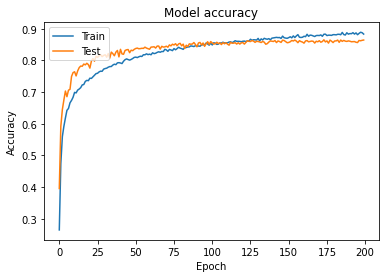

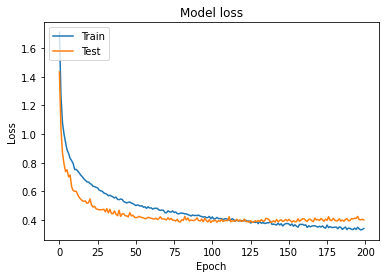

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#*****************************************
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [0]:
################################################################******** PREDICTIONS ***********####################################################

In [0]:
################################################ TESTING ENVIRONMENT ###############################################################

In [0]:
##### Reading the backup files
sample_submission  = pd.read_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureAlgo/sample_submission.csv')

In [0]:
df_id_2 = pd.merge(sample_submission,data_tst_ids,how='left',on='fund_id')

In [0]:
df_id_2.sample(4)

,fund_id,greatstone_rating,tag,id
3406,60f09bad-793e-4bb7-95cf-b0364b5f3681,NaN,217619,217619
757,a184f641-e85a-4d80-9ccc-030a179e79b5,NaN,56618,56618
3624,4d52941e-502a-41db-aa6c-011a90fec6ea,NaN,148175,148175
4544,beec1bf2-8bb5-489d-8abd-a25b0a658ba0,NaN,93734,93734


In [0]:
df_id_2.isnull().sum()

fund_id                 0
greatstone_rating    5000
tag                     0
id                      0
dtype: int64

In [0]:

df_id_2.drop(columns='greatstone_rating',axis=1,inplace=True)

In [0]:
df_id_2.shape

(5000, 3)

In [0]:
########################## PREDICTIONS #########################################

In [0]:
data_tst.shape

(5000, 958)

In [0]:
data_tst_minmax_0 = mm_scaler.transform(data_tst[col_int]) 

In [0]:
y_test_pred = model.predict(data_tst_minmax_0)

In [0]:
y_test_pred

array([[7.53269376e-07, 1.33464569e-02, 9.44942296e-01, 4.07601856e-02,
        9.39054415e-04, 1.12384996e-05],
       [5.54322141e-05, 3.06013972e-05, 1.08756265e-02, 3.35539341e-01,
        6.49420798e-01, 4.07822989e-03],
       [2.73574460e-06, 1.63198530e-03, 8.21918726e-01, 1.71766013e-01,
        4.66681411e-03, 1.36745748e-05],
       ...,
       [4.91394258e-06, 4.49154004e-06, 3.95773463e-02, 8.98307264e-01,
        6.20918199e-02, 1.41164273e-05],
       [1.82470503e-05, 2.64220755e-03, 7.39048660e-01, 2.47975543e-01,
        1.02628758e-02, 5.24841162e-05],
       [3.90217201e-06, 8.78869207e-04, 7.30705202e-01, 2.61236995e-01,
        7.16108177e-03, 1.40207894e-05]], dtype=float32)

In [0]:
model_OVRC_predict = [np.argmax(x) for x in y_test_pred]
(unique, counts) = numpy.unique(model_OVRC_predict, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T
frequencies

array([[   0,  324],
       [   1,  348],
       [   2, 1107],
       [   3, 1582],
       [   4, 1231],
       [   5,  408]])

In [0]:
####################################################################################################################################

In [0]:
tag_id = list(data_tst_ids['tag'].values)
rating = list(model_OVRC_predict)

In [0]:
df_rating = pd.DataFrame()

In [0]:
df_rating['tag'] = tag_id
df_rating['greatstone_rating'] = rating

In [0]:
df_rating.shape

(5000, 2)

In [0]:
df_rating.greatstone_rating.nunique()

6

In [0]:
df_rating.sample(3)

,tag,greatstone_rating
1575,186605,2
4672,76031,3
2545,144548,2


In [0]:

df_rating.isnull().sum()

tag                  0
greatstone_rating    0
dtype: int64

In [0]:
df_rating.sample(4)

,tag,greatstone_rating
2325,95804,2
1677,132587,4
593,137780,4
3752,130571,3


In [0]:
df2 = pd.merge(df_id_2,df_rating,how='left',on='tag')

df2.sample(3)

,fund_id,tag,id,greatstone_rating
4866,2b8adfa3-e5dd-457b-8eda-5c4088733c7e,29906,29906,4
3810,eeb6d2f0-ba4f-4bcb-b8b0-f82684cf3092,68219,68219,4
1818,c1411b7b-0553-4f64-9e15-3586bd0e2445,174842,174842,2


In [0]:
#df_data = pd.merge(sample_submission.drop(columns='greatstone_rating',axis=1),df2,how='left',on='fund_id')
df_data = df2.drop(columns=['tag','id'],axis=1)
df_data.tail(5)

,fund_id,greatstone_rating
4995,cd0a6c98-3d60-4548-a9db-493d80702107,4
4996,5a824843-621b-469f-a7d3-bae5b78beece,2
4997,acb8601f-bb42-4fe3-9823-c124d38cfc82,0
4998,e3f00c88-98d9-4a44-930c-891513652f8a,4
4999,ef6f6819-2879-41c3-9736-ab1bf4d97869,4


In [0]:
sample_submission.tail(5)

,fund_id,greatstone_rating
4995,cd0a6c98-3d60-4548-a9db-493d80702107,NaN
4996,5a824843-621b-469f-a7d3-bae5b78beece,NaN
4997,acb8601f-bb42-4fe3-9823-c124d38cfc82,NaN
4998,e3f00c88-98d9-4a44-930c-891513652f8a,NaN
4999,ef6f6819-2879-41c3-9736-ab1bf4d97869,NaN


In [0]:
df_data.isnull().sum()

fund_id              0
greatstone_rating    0
dtype: int64

In [0]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

def create_download_link(df, title = "Download CSV file", filename = "submission.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df_data)